Data source: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer


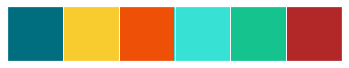

In [3]:
sns.set()
colors = ['#006E7F','#F8CB2E','#EE5007', '#37E2D5', '#14C38E','#B22727']
sns.palplot(sns.color_palette(colors))

In [4]:
customer_df = pd.read_csv('BankChurners.csv')
customer_df

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  \
0                  39  ...       12691.0                  777   
1                  44  ...        8256.0                  864   
2                  36  ...        3418.0                    0   
3                  34  ...        3313.0                 2517   
4                  21  ...        4716.0                    0   
...               ...  ...           ...                  ...   
10122              40  ...        4003.0                 1851   
10123              25  ...        4277.0                 2186   
10124              36  ...        5409.0                    0   
10125              36  ...        5281.0                    0   
10126              25  ...       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
0                    1.625                  0.061   
1                    3.714                  0.105   
2                    2.333                  0.000   
3                    2.333                  0.760   
4                    2.500                  0.000   
...                    ...                    ...   
10122                0.857                  0.462   
10123                0.683                  0.511   
10124     

In [5]:
#Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
#Customer_Age: Demographic variable - Customer's Age in Years
#Gender: Demographic variable - M=Male, F=Female
#Dependent_count: Demographic variable - Number of dependents
#Education_Level: Demographic variable - Educational Qualification of the account holder 
#Marital_Status: Demographic variable - Married, Single, Divorced, Unknown
#Income_Category: Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120k)
#Card_Category: Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
#Months_on_book: Period of relationship with bank
#Total_Relationship_Count: Total no. of products held by the customer
#Months_Inactive_12_mon: No. of months inactive in the last 12 months
#Contacts_Count_12_mon: No. of Contacts in the last 12 months
#Credit_Limit: Credit Limit on the Credit Card
#Total_Revolving_Bal: Total Revolving Balance on the Credit Card
#Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
#Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
#Total_Trans_Amt: Total Transaction Amount (Last 12 months)
#Total_Trans_Ct: Total Transaction Count (Last 12 months)
#Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
#Avg_Utilization_Ratio: Average Card Utilization Ratio

In [6]:
customer_df.drop(columns = ["CLIENTNUM", customer_df.columns[len(customer_df.columns) - 1], customer_df.columns[len(customer_df.columns) - 2]], inplace = True)

In [7]:
customer_df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [8]:
customer_df.nunique()

Attrition_Flag                 2
Customer_Age                  45
Gender                         2
Dependent_count                6
Education_Level                7
Marital_Status                 4
Income_Category                6
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_Q1        1158
Total_Trans_Amt             5033
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
dtype: int64

In [9]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [10]:
customer_df.head(10).T

0                  1  \
Attrition_Flag            Existing Customer  Existing Customer   
Customer_Age                             45                 49   
Gender                                    M                  F   
Dependent_count                           3                  5   
Education_Level                 High School           Graduate   
Marital_Status                      Married             Single   
Income_Category                 $60K - $80K     Less than $40K   
Card_Category                          Blue               Blue   
Months_on_book                           39                 44   
Total_Relationship_Count                  5                  6   
Months_Inactive_12_mon                    1                  1   
Contacts_Count_12_mon                     3                  2   
Credit_Limit                          12691               8256   
Total_Revolving_Bal                     777                864   
Avg_Open_To_Buy                       11914               7392   
Total_Amt_Chng_Q4_Q1                  1.335              1.541   
Total_Trans_Amt                        1144               1291   
Total_Trans_Ct                           42                 33   
Total_Ct_Chng_Q4_Q1                   1.625              3.714   
Avg_Utilization_Ratio                 0.061              0.105   

                                          2                  3  \
Attrition_Flag            Existing Customer  Existing Customer   
Customer_Age                             51                 40   
Gender                                    M                  F   
Dependent_count                           3                  4   
Education_Level                    Graduate        High School   
Marital_Status                      Married            Unknown   
Income_Category                $80K - $120K     Less than $40K   
Card_Category                          Blue               Blue   
Months_on_book                           36                 34   
Total_Relationship_Count                  4                  3   
Months_Inactive_12_mon                    1                  4   
Contacts_Count_12_mon                     0                  1   
Credit_Limit                           3418               3313   
Total_Revolving_Bal                       0               2517   
Avg_Open_To_Buy                        3418                796   
Total_Amt_Chng_Q4_Q1                  2.594              1.405   
Total_Trans_Amt                        1887               1171   
Total_Trans_Ct                           20                 20   
Total_Ct_Chng_Q4_Q1                   2.333              2.333   
Avg_Utilization_Ratio                     0               0.76   

                                          4                  5  \
Attrition_Flag            Existing Customer  Existing Customer   
Customer_Age                             40                 44   
Gender                                    M                  M   
Dependent_count                           3                  2   
Education_Level                  Uneducated           Graduate   
Marital_Status                      Married            Married   
Income_Category                 $60K - $80K        $40K - $60K   
Card_Category                          Blue               Blue   
Months_on_book                           21                 36   
Total_Relationship_Count                  5                  3   
Months_Inactive_12_mon                    1                  1   
Contacts_Count_12_mon                     0                  2   
Credit_Limit                           4716               4010   
Total_Revolving_Bal                       0               1247   
Avg_Open_To_Buy                        4716               2763   
Total_Amt_Chng_Q4_Q1                  2.175              1.376   
Total_Trans_Amt                         816               1088   
Total_Trans_Ct                           28                 24   
Total_Ct_Chng_

## numerical columns

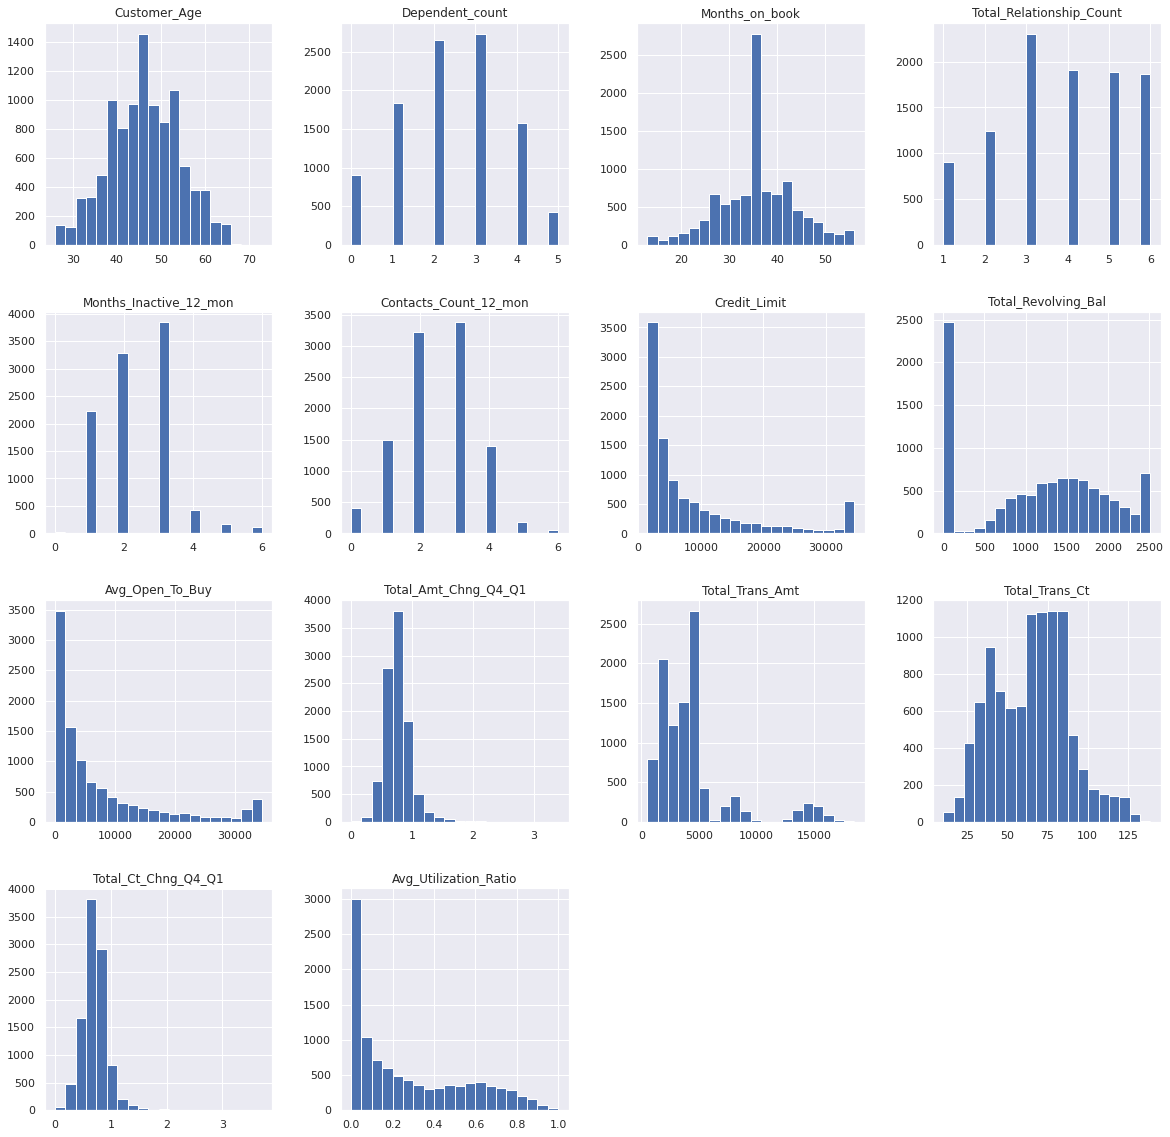

In [11]:
axList = customer_df.hist(bins=20, figsize = (20, 20))
plt.savefig("Hist.png")

In [12]:
import math
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [13]:
fig = px.histogram(customer_df, x="Customer_Age", title = "Customer Age Distribution",color="Gender")
fig.update_layout(bargap=0.2)
fig.show()

In [14]:
num_cols = ['Months_on_book', 'Customer_Age', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
            'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Dependent_count',
            'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
            'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

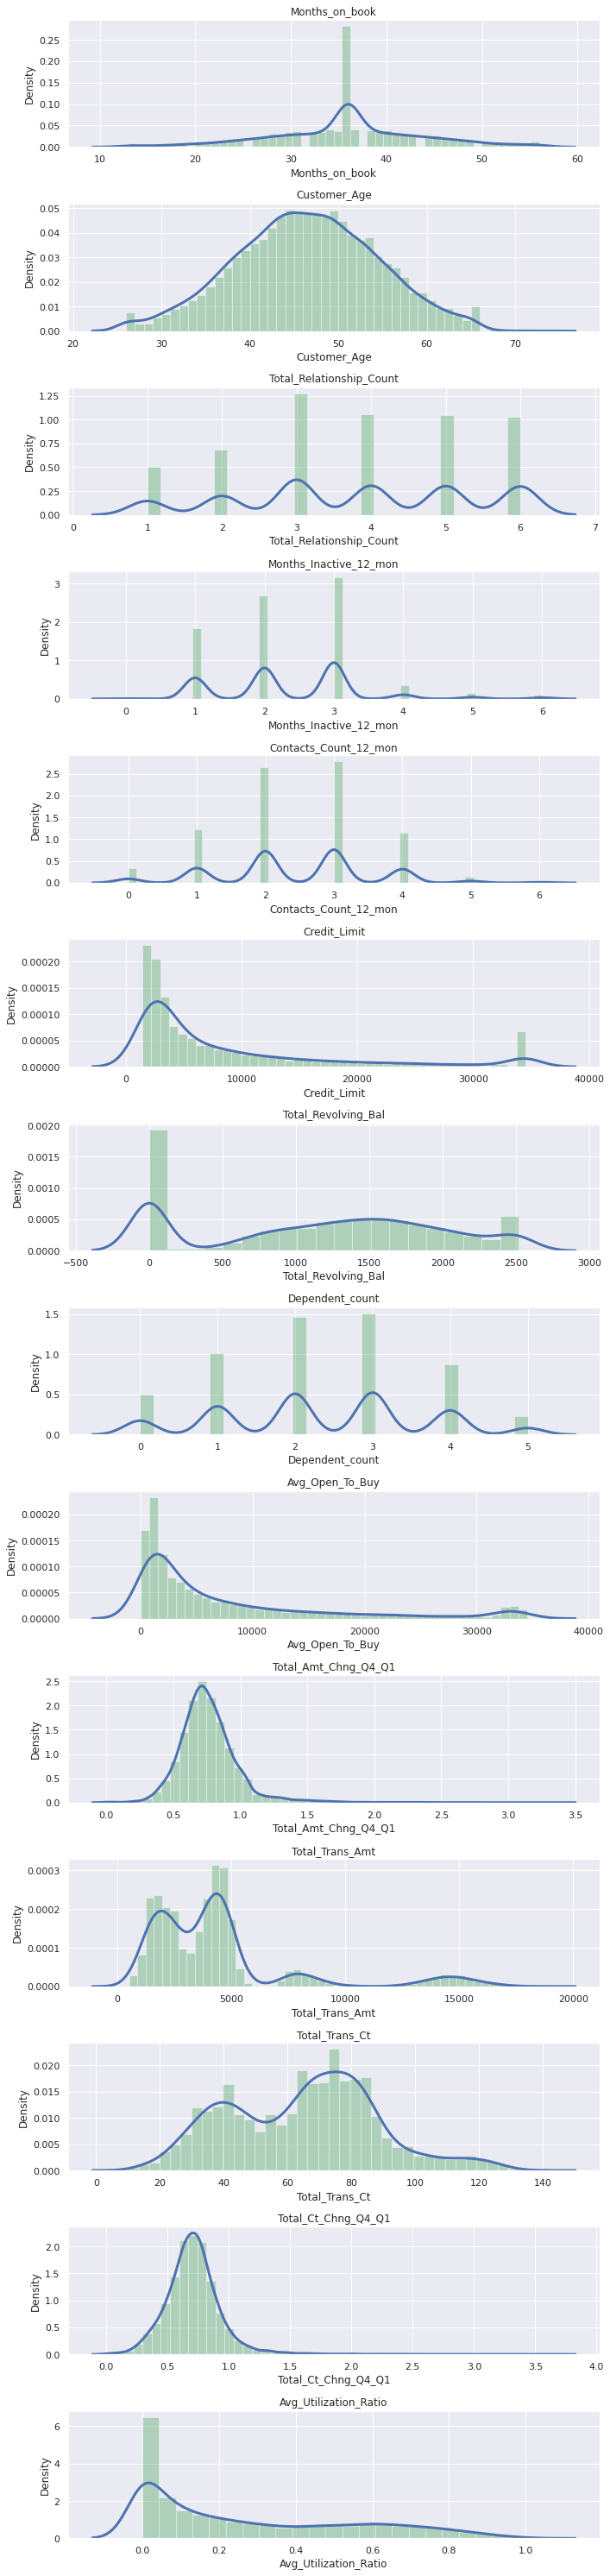

In [15]:
plt.figure(figsize=(10,50))
for e, i in enumerate(num_cols):
    plt.subplot(17, 1, e+1)
    sns.distplot(customer_df[i], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
    plt.title(i)

plt.tight_layout()

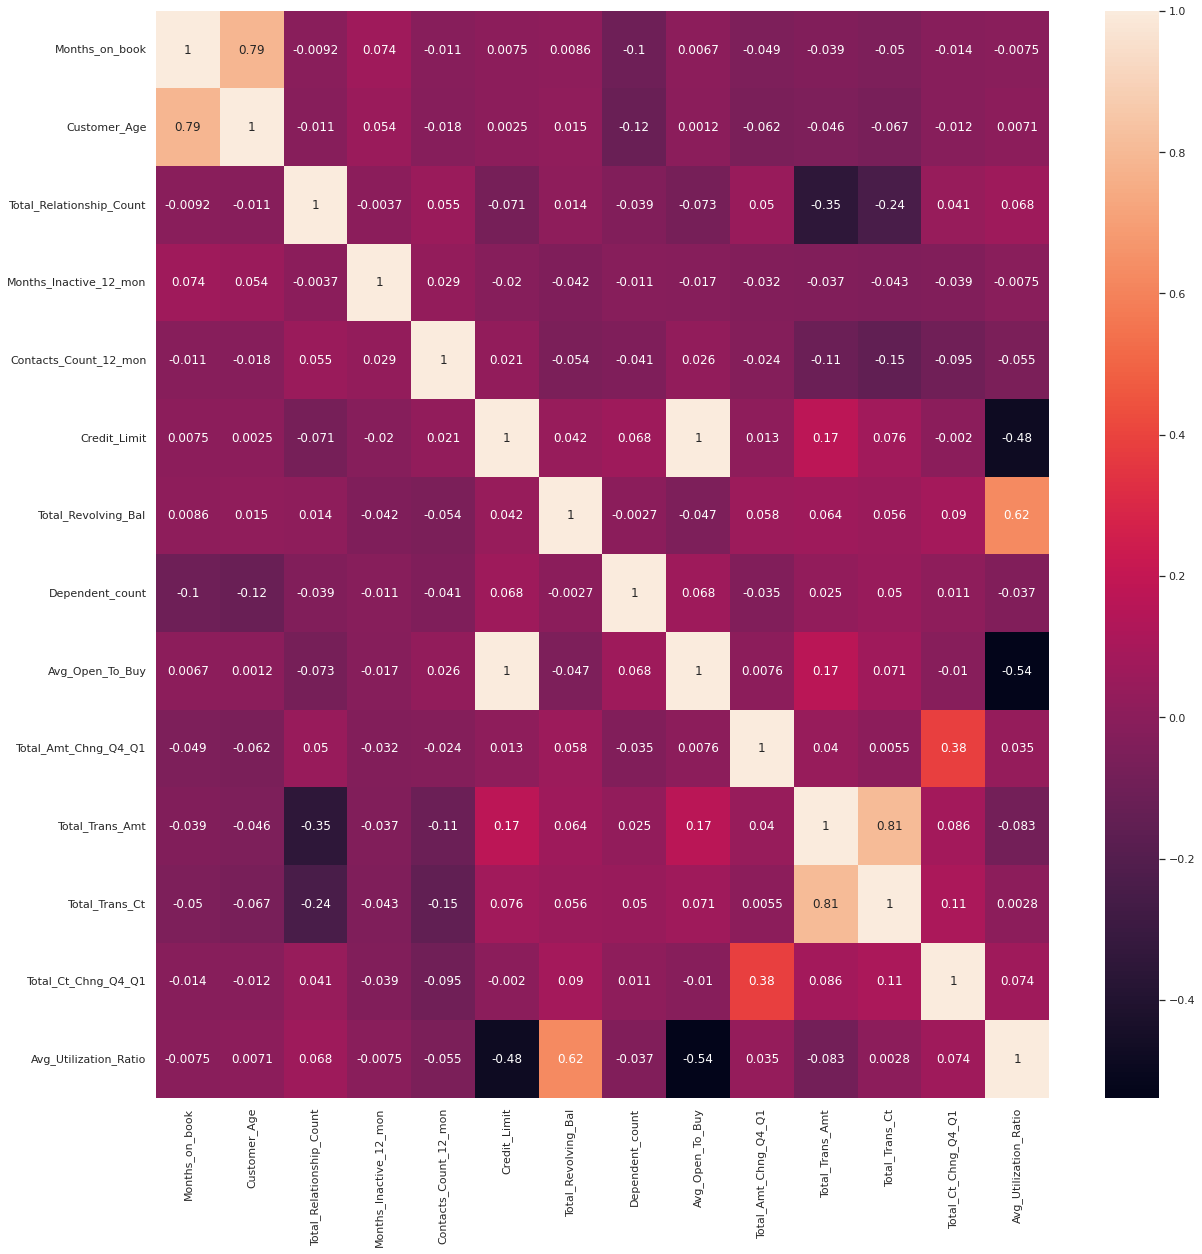

In [16]:
plt.figure(figsize=(20, 20))
sns.heatmap(customer_df[num_cols].corr(), annot=True);

In [17]:
fig = px.histogram(customer_df, x="Education_Level", y="Credit_Limit", color="Income_Category")
fig.show()

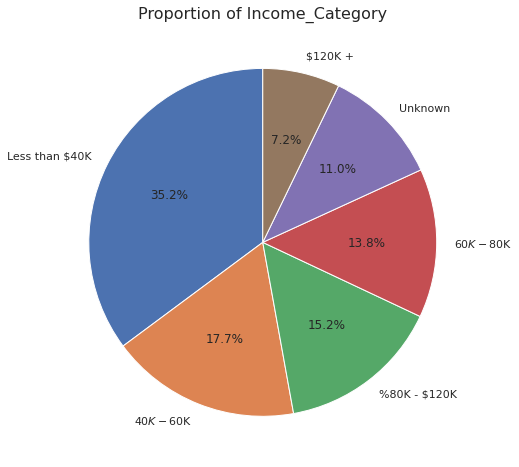

<AxesSubplot:xlabel='Income_Category', ylabel='Attrition_Flag'>

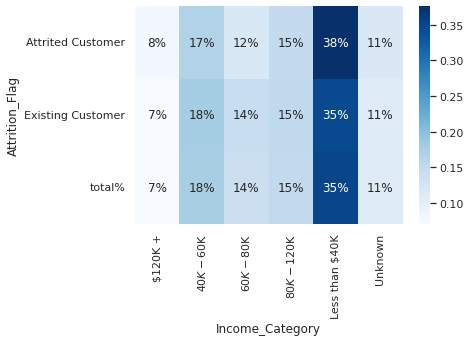

In [18]:
plt.figure(figsize = (8,8))
plt.pie(customer_df['Income_Category'].value_counts(),
        labels = ['Less than $40K', '$40K - $60K', '%80K - $120K', '$60K - $80K', 'Unknown','$120K +'],
        autopct='%1.1f%%', startangle = 90)
plt.title('Proportion of Income_Category', fontsize = 16)
plt.show()

# Attrition proportion between genders to see the probability of churning  in each education level category
cross = pd.crosstab(customer_df['Attrition_Flag'], 
            customer_df['Income_Category'], 
            margins = True, 
            margins_name = "total%", 
            normalize='index')
sns.heatmap(cross, annot=True, fmt='.0%', cmap='Blues')

## categorical columns

In [19]:
cat_cols = ['Attrition_Flag', 'Gender','Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

In [20]:
#imputer = SimpleImputer(strategy='most_frequent', missing_values='Unknown')

#customer_df[cat_cols] = imputer.fit_transform(customer_df[cat_cols])

In [21]:
for i in cat_cols:
    print(i)
    print(customer_df[i].unique())
    print('-'*25)

Attrition_Flag
['Existing Customer' 'Attrited Customer']
-------------------------
Gender
['M' 'F']
-------------------------
Education_Level
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
-------------------------
Marital_Status
['Married' 'Single' 'Unknown' 'Divorced']
-------------------------
Income_Category
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
-------------------------
Card_Category
['Blue' 'Gold' 'Silver' 'Platinum']
-------------------------


In [22]:
#Cast all categorical variables to the category type
customer_df = customer_df.astype({'Attrition_Flag':'category','Gender':'category','Education_Level':'category','Marital_Status':'category',
                'Income_Category':'category','Card_Category':'category'})
# Codify nominal variables 
customer_df['Attrition_Flag'] = customer_df['Attrition_Flag'].cat.set_categories(['Existing Customer', 'Attrited Customer'], ordered = True).cat.codes
customer_df['Gender'] = customer_df['Gender'].cat.set_categories(['M', 'F'], ordered=True).cat.codes
customer_df['Marital_Status'] = customer_df['Marital_Status'].cat.set_categories(['Married', 'Unknown', 'Single', 'Divorced'], 
                                                                                 ordered = True).cat.codes
# Codify ordinal variables
customer_df['Education_Level'] = customer_df['Education_Level'].cat.set_categories(['Unknown', 'Uneducated','High School','College','Graduate','Post-Graduate','Doctorate'],
                                                                 ordered=True).cat.codes
customer_df['Income_Category'] = customer_df['Income_Category'].cat.set_categories(["Unknown", 'Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +'],
                                                                 ordered=True).cat.codes
customer_df['Card_Category'] = customer_df['Card_Category'].cat.set_categories(['Blue','Silver','Gold','Platinum'],
                                                             ordered=True).cat.codes

In [23]:
for i in cat_cols:
    print(i)
    print(customer_df[i].unique())
    print('-'*25)

Attrition_Flag
[0 1]
-------------------------
Gender
[0 1]
-------------------------
Education_Level
[2 4 1 0 3 5 6]
-------------------------
Marital_Status
[0 2 1 3]
-------------------------
Income_Category
[3 1 4 2 5 0]
-------------------------
Card_Category
[0 2 1 3]
-------------------------


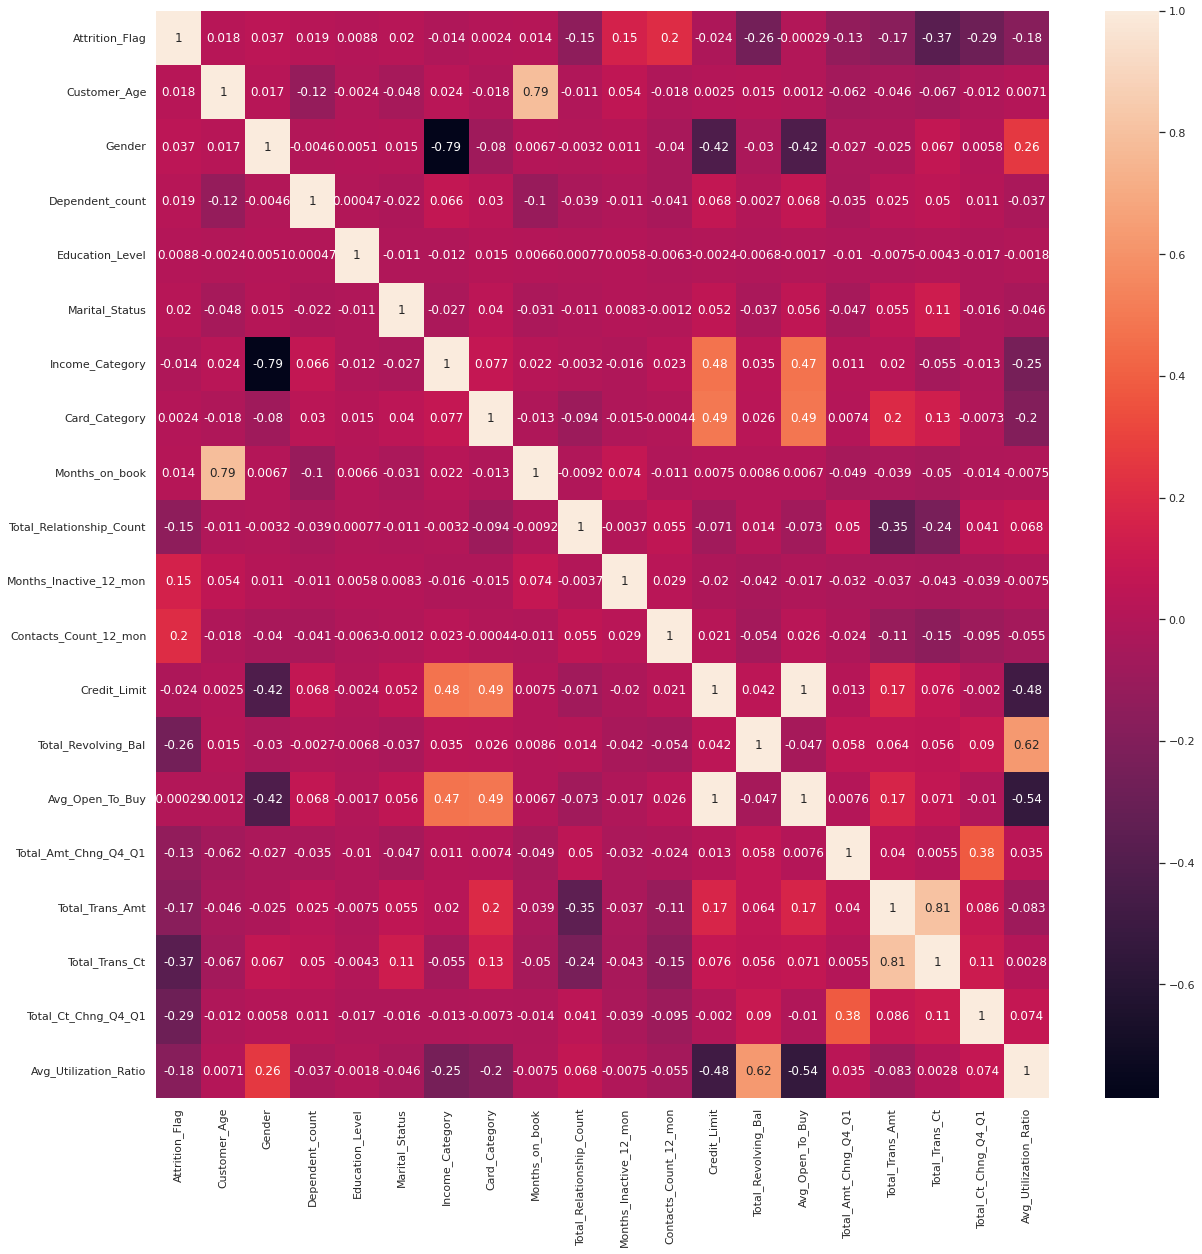

In [24]:
plt.figure(figsize=(20, 20))
corr_matrix = customer_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

## Kmean Clustering without dimensionality deduction

In [25]:
# Let's scale the data first
scaler = StandardScaler()
customer_df_scaled = scaler.fit_transform(customer_df)

In [26]:
customer_df_scaled.shape

(10127, 20)

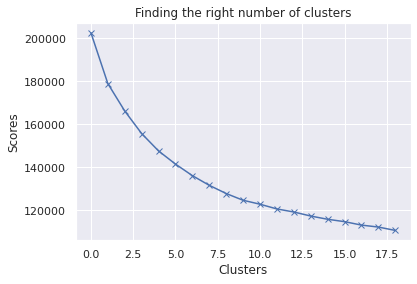

In [50]:
scores_1 = []

range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(customer_df_scaled)
    scores_1.append(kmeans.inertia_) 

plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

# From this we can observe that, 7th cluster seems to be forming the elbow of the curve. 

In [28]:
kmeans = KMeans(7)
kmeans.fit(customer_df_scaled)
labels = kmeans.labels_

In [29]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [customer_df.columns])
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [customer_df.columns])
cluster_centers

#First Customer Cluster: older age, low to median income, married, use credit card frequently
#Second Customer Cluster: Churners
#Third Customer Cluster: Higher income, Men
#Fourth Customer Cluster: making frequent transaction 

Attrition_Flag Customer_Age    Gender Dependent_count Education_Level  \
0       0.039523    56.078419  0.626098        1.365747        2.613551   
1       0.999195    46.707965  0.630732        2.446500        2.646822   
2       0.068740    46.168576  0.002182        2.553191        2.509547   
3       0.006068    45.520631  0.400485        2.283981        2.543689   
4       0.001818    44.725455  0.829091        2.544848        2.576970   
5       0.155678    45.745421  0.254579        2.600733        2.723443   
6       0.042265    41.356586  0.711941        2.610176        2.650390   

  Marital_Status Income_Category Card_Category Months_on_book  \
0       0.885194        1.689460      0.007528      44.585320   
1       1.086887        1.816573      0.017699      36.320193   
2       1.052373        3.911075      0.000546      35.813421   
3       1.098301        2.310680      0.074029      35.305825   
4       1.166667        1.096364      0.024242      34.671515   
5       1.285714        2.871795      1.283883      35.534799   
6       1.089865        1.526877      0.004103      31.302421   

  Total_Relationship_Count Months_Inactive_12_mon Contacts_Count_12_mon  \
0                 4.251568               2.317440              2.441656   
1                 3.242156               2.721641              3.014481   
2                 4.198582               2.292962              2.527005   
3                 2.144417               2.195388              2.151699   
4                 4.053939               2.305455              2.287879   
5                 3.318681               2.291209              2.457875   
6                 4.037341               2.283545              2.340583   

   Credit_Limit Total_Revolving_Bal Avg_Open_To_Buy Total_Amt_Chng_Q4_Q1  \
0   4164.994918         1535.481179     2629.513739             0.754521   
1   5397.706597          451.208367     4946.498230             0.672500   
2  17220.289253         1157.738134    16062.551118             0.776593   
3  10914.207524         1400.546117     9513.661408             0.772943   
4   5584.684606          432.082424     5152.602182             0.743736   
5  29474.701465         1242.293040    28232.408425             0.765346   
6   3365.379606         1682.395158     1682.984448             0.800923   

  Total_Trans_Amt Total_Trans_Ct Total_Ct_Chng_Q4_Q1 Avg_Utilization_Ratio  
0     3210.393977      58.271644            0.724783              0.471054  
1     2701.839099      42.766693            0.524059              0.116621  
2     3294.326787      58.450082            0.734988              0.091514  
3    13229.838592     106.317961            0.730102              0.203902  
4     3961.128485      70.183030            0.734423              0.078254  
5     6598.250916      75.241758            0.708778              0.046106  
6     3711.954452      65.306114            0.762552              0.573645

In [30]:
y_kmeans = kmeans.fit_predict(customer_df_scaled)
y_kmeans

array([1, 2, 1, ..., 4, 4, 4], dtype=int32)

In [31]:
customer_df_cluster = pd.concat([customer_df, pd.DataFrame({'cluster':labels})], axis = 1)

## Visualization and Dimensional Reduction using PCA

In [33]:
# Obtain the principal components 
pca = PCA()
principal_comp = pca.fit_transform(customer_df_scaled)
pca_df = pd.DataFrame(data = principal_comp[:, :2], columns =['pca1','pca2'])
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

pca1      pca2  cluster
0  0.958930  0.099426        2
1 -0.835464 -2.526542        4
2  0.308615 -1.385776        2
3 -2.378170 -2.093812        6
4  0.156984 -1.771377        2

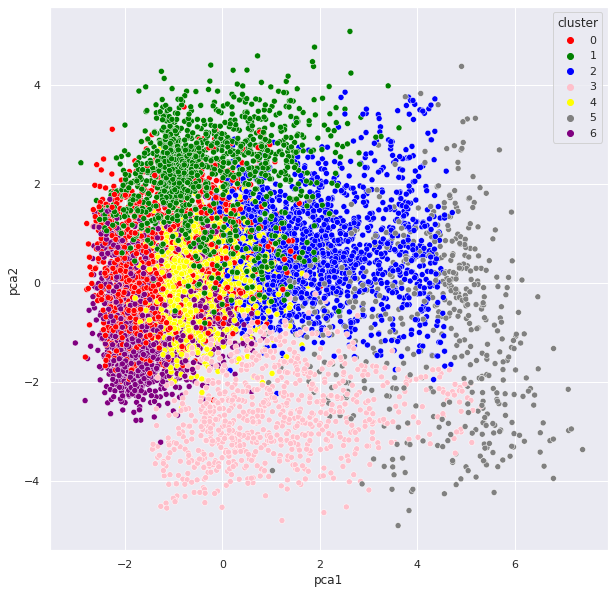

In [35]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple'])
plt.show()

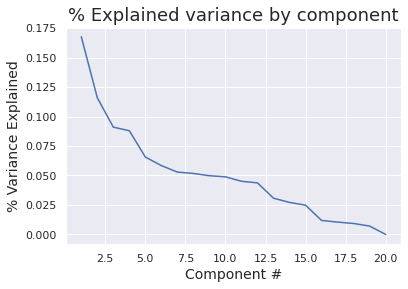

In [38]:
plt.plot(np.arange(1,21),pca.explained_variance_ratio_[0:20])
plt.title("% Explained variance by component",size=18)
plt.xlabel("Component #",size=14)
plt.ylabel("% Variance Explained",size=14)
plt.show()

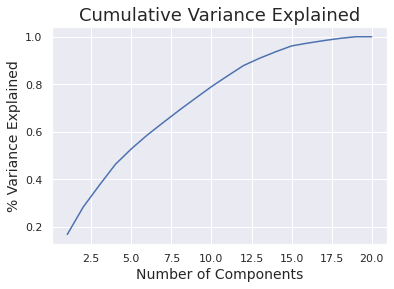

In [41]:
plt.plot(np.arange(1, 21),np.cumsum(pca.explained_variance_ratio_))
plt.title("Cumulative Variance Explained",size=18)
plt.xlabel("Number of Components",size=14)
plt.ylabel("% Variance Explained",size=14)
plt.show()

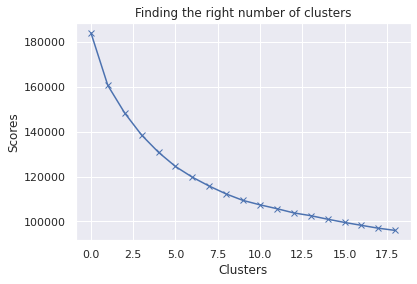

In [51]:
#clustering using the first 13 principle component

scores_pca = []

range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(principal_comp[:, :13])
    scores_pca.append(kmeans.inertia_) 

plt.plot(scores_pca, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

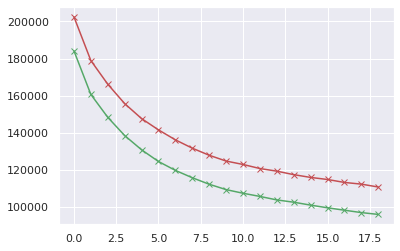

In [52]:
plt.plot(scores_1, 'bx-', color = 'r')
plt.plot(scores_pca, 'bx-', color = 'g')

No significant improvement

In [67]:
kmeans = KMeans(n_clusters=6,n_init=10)
group_pca = kmeans.fit_predict(principal_comp)

In [68]:
group_pca.shape

(10127,)

In [69]:
np.unique(group_pca)

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [70]:
pca_c_df = pd.DataFrame(data = principal_comp[:, :2], columns =['pca1','pca2'])
pca_c_df = pd.concat([pca_c_df,pd.DataFrame({'cluster':group_pca})], axis = 1)
pca_c_df.head()

pca1      pca2  cluster
0  0.958930  0.099426        4
1 -0.835464 -2.526542        5
2  0.308615 -1.385776        4
3 -2.378170 -2.093812        5
4  0.156984 -1.771377        4

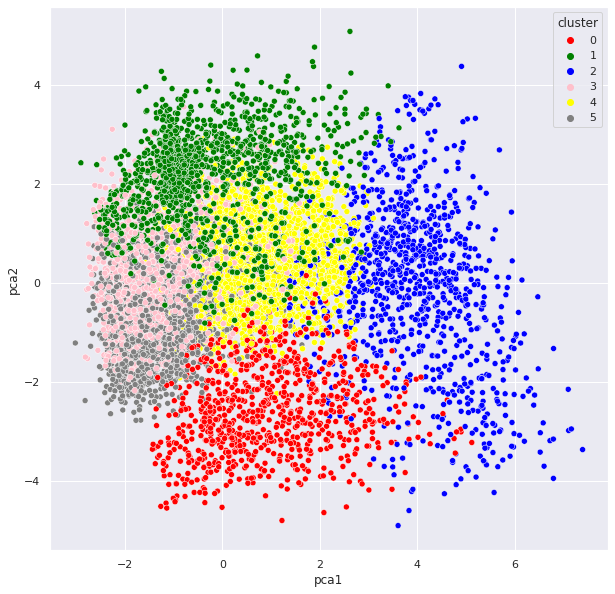

In [71]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_c_df, palette =['red','green','blue','pink','yellow','gray'])
plt.show()

## Visualization using MDS

In [39]:
from sklearn.manifold import MDS

In [40]:
mds = MDS(n_components=2,verbose=1,eps=1e-5)
mds.fit(customer_df_scaled)

MDS(eps=1e-05, verbose=1)

In [45]:
np.save("mds.npy", mds.embedding_)

In [46]:
mds_df = pd.DataFrame(data = mds.embedding_[:, :2], columns =['mds1','mds2'])
mds_df = pd.concat([mds_df,pd.DataFrame({'cluster':labels})], axis = 1)
mds_df.head()

mds1       mds2  cluster
0  -1.734589   5.241322        2
1   9.365709 -10.411303        4
2 -10.447471   5.928445        2
3   3.277185  -8.528245        6
4  -8.792548  -7.228612        2

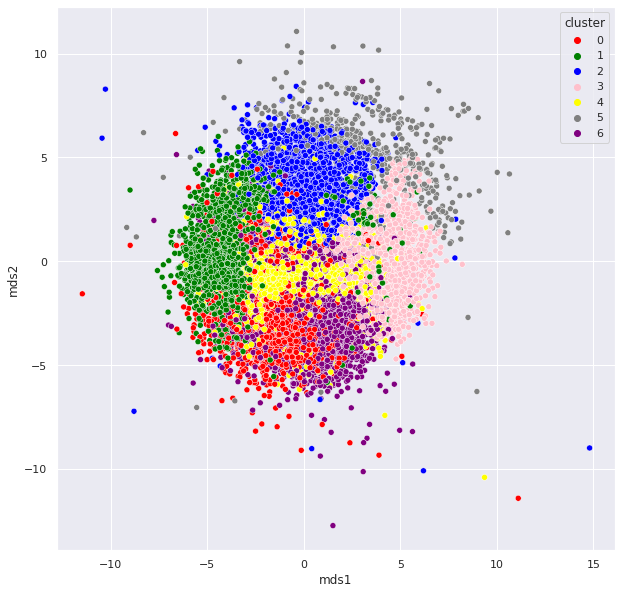

In [47]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="mds1", y="mds2", hue = "cluster", data = mds_df, palette =['red','green','blue','pink','yellow','gray','purple'])
plt.show()

In [75]:
mds_c_df = pd.DataFrame(data = mds.embedding_[:, :2], columns =['mds1','mds2'])
mds_c_df = pd.concat([mds_c_df,pd.DataFrame({'cluster':group_pca})], axis = 1)
mds_c_df.head()

mds1       mds2  cluster
0  -1.734589   5.241322        4
1   9.365709 -10.411303        5
2 -10.447471   5.928445        4
3   3.277185  -8.528245        5
4  -8.792548  -7.228612        4

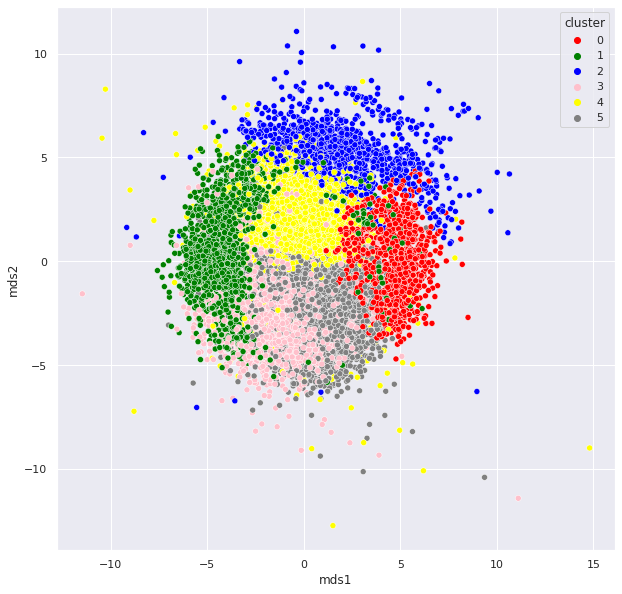

In [76]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="mds1", y="mds2", hue = "cluster", data = mds_c_df, palette =['red','green','blue','pink','yellow','gray'])
plt.show()

## Visualization using T-SNE

In [54]:
from sklearn.manifold import TSNE

In [74]:
tsne = TSNE(n_components=2,verbose=1,perplexity=40)
z_tsne = tsne.fit_transform(customer_df_scaled)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10127 samples in 0.001s...
[t-SNE] Computed neighbors for 10127 samples in 2.542s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10127
[t-SNE] Computed conditional probabilities for sample 2000 / 10127
[t-SNE] Computed conditional probabilities for sample 3000 / 10127
[t-SNE] Computed conditional probabilities for sample 4000 / 10127
[t-SNE] Computed conditional probabilities for sample 5000 / 10127
[t-SNE] Computed conditional probabilities for sample 6000 / 10127
[t-SNE] Computed conditional probabilities for sample 7000 / 10127
[t-SNE] Computed conditional probabilities for sample 8000 / 10127
[t-SNE] Computed conditional probabilities for sample 9000 / 10127
[t-SNE] Computed conditional probabilities for sample 10000 / 10127
[t-SNE] Computed conditional probabilities for sample 10127 / 10127
[t-SNE] Mean sigma: 1.197392
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.153908
[t-SNE] KL

In [58]:
z_tsne.shape

(10127, 2)

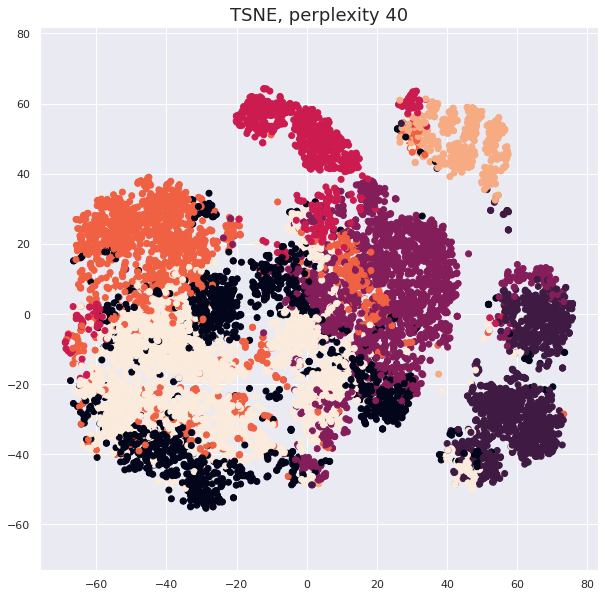

In [77]:
plt.figure(figsize=(10,10))
plt.scatter(z_tsne[:,0],z_tsne[:,1], c= labels)
plt.title("TSNE, perplexity 40",size=18)
plt.axis("equal")
plt.show()

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 10127 samples in 0.064s...
[t-SNE] Computed neighbors for 10127 samples in 2.093s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10127
[t-SNE] Computed conditional probabilities for sample 2000 / 10127
[t-SNE] Computed conditional probabilities for sample 3000 / 10127
[t-SNE] Computed conditional probabilities for sample 4000 / 10127
[t-SNE] Computed conditional probabilities for sample 5000 / 10127
[t-SNE] Computed conditional probabilities for sample 6000 / 10127
[t-SNE] Computed conditional probabilities for sample 7000 / 10127
[t-SNE] Computed conditional probabilities for sample 8000 / 10127
[t-SNE] Computed conditional probabilities for sample 9000 / 10127
[t-SNE] Computed conditional probabilities for sample 10000 / 10127
[t-SNE] Computed conditional probabilities for sample 10127 / 10127
[t-SNE] Mean sigma: 0.704088
[t-SNE] KL divergence after 250 iterations with early exaggeration: 105.224716
[t-SNE] KL

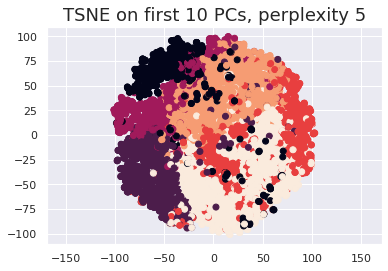

In [78]:
plt.figure(figsize=(10,10))
tsne = TSNE(n_components=2,verbose=1,perplexity=5)
z_tsne = tsne.fit_transform(principal_comp[:, :13])
plt.scatter(z_tsne[:,0],z_tsne[:,1],c=group_pca)
plt.title("TSNE on first 10 PCs, perplexity 5",size=18)
plt.axis("equal")
plt.show()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10127 samples in 0.015s...
[t-SNE] Computed neighbors for 10127 samples in 1.384s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10127
[t-SNE] Computed conditional probabilities for sample 2000 / 10127
[t-SNE] Computed conditional probabilities for sample 3000 / 10127
[t-SNE] Computed conditional probabilities for sample 4000 / 10127
[t-SNE] Computed conditional probabilities for sample 5000 / 10127
[t-SNE] Computed conditional probabilities for sample 6000 / 10127
[t-SNE] Computed conditional probabilities for sample 7000 / 10127
[t-SNE] Computed conditional probabilities for sample 8000 / 10127
[t-SNE] Computed conditional probabilities for sample 9000 / 10127
[t-SNE] Computed conditional probabilities for sample 10000 / 10127
[t-SNE] Computed conditional probabilities for sample 10127 / 10127
[t-SNE] Mean sigma: 0.951214
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.470818
[t-SNE] KL

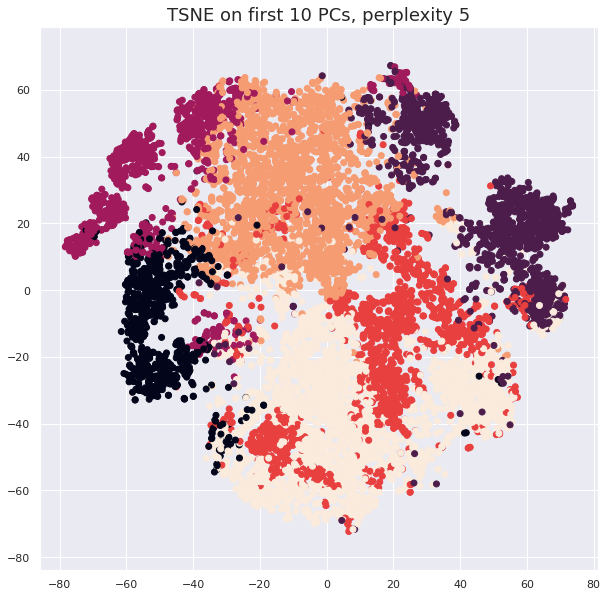

In [79]:
plt.figure(figsize=(10,10))
tsne = TSNE(n_components=2,verbose=1,perplexity=40)
z_tsne = tsne.fit_transform(principal_comp[:, :10])
plt.scatter(z_tsne[:,0],z_tsne[:,1],c=group_pca)
plt.title("TSNE on first 10 PCs, perplexity 40",size=18)
plt.axis("equal")
plt.show()

# APPLY AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)

In [80]:
customer_df_scaled.shape

(10127, 20)

In [83]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import Adam

encoding_dim = 7

input_df = Input(shape=(20,))


# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution 

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(20, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)
autoencoder.compile(optimizer= 'Adam', loss='mean_squared_error')

In [84]:
autoencoder.fit(customer_df_scaled, customer_df_scaled, batch_size = 128, epochs = 25,  verbose = 1)

Epoch 1/25
80/80 [==============================] - 3s 34ms/step - loss: 0.6704
Epoch 2/25
80/80 [==============================] - 1s 16ms/step - loss: 0.5023
Epoch 3/25
80/80 [==============================] - 2s 22ms/step - loss: 0.4456
Epoch 4/25
80/80 [==============================] - 1s 14ms/step - loss: 0.4156
Epoch 5/25
80/80 [==============================] - 1s 19ms/step - loss: 0.3890
Epoch 6/25
80/80 [==============================] - 1s 14ms/step - loss: 0.3706
Epoch 7/25
80/80 [==============================] - 1s 15ms/step - loss: 0.3522
Epoch 8/25
80/80 [==============================] - 1s 15ms/step - loss: 0.3404
Epoch 9/25
80/80 [==============================] - 2s 25ms/step - loss: 0.3267
Epoch 10/25
80/80 [==============================] - 3s 33ms/step - loss: 0.3116
Epoch 11/25
80/80 [==============================] - 3s 37ms/step - loss: 0.3058
Epoch 12/25
80/80 [==============================] - 2s 21ms/step - loss: 0.2921
Epoch 13/25
80/80 [==================

In [85]:
autoencoder.save_weights('autoencoder.h5')

In [86]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense_8 (Dense)             (None, 7)                 147       
                                                                 
 dense_9 (Dense)             (None, 500)               4000      
                                                                 
 dense_10 (Dense)            (None, 500)               250500    
                                                                 
 dense_11 (Dense)            (None, 2000)              1002000   
                                                                 
 dense_12 (Dense)            (None, 10)                20010     
                                                                 
 dense_13 (Dense)            (None, 2000)              2200

In [87]:
pred = encoder.predict(customer_df_scaled)

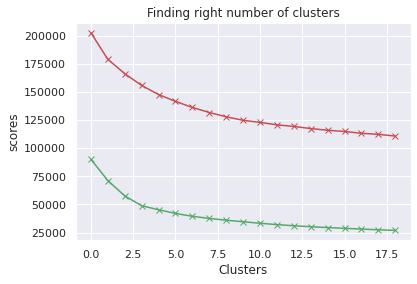

In [88]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(pred)
    scores_2.append(kmeans.inertia_)

plt.plot(scores_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

performance increased significantly

In [89]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(customer_df_scaled)

In [90]:
df_cluster_dr = pd.concat([customer_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
0               0            45       0                3                2   
1               0            49       1                5                4   
2               0            51       0                3                4   
3               0            40       1                4                2   
4               0            40       0                3                1   

   Marital_Status  Income_Category  Card_Category  Months_on_book  \
0               0                3              0              39   
1               2                1              0              44   
2               0                4              0              36   
3               1                1              0              34   
4               0                3              0              21   

   Total_Relationship_Count  ...  Contacts_Count_12_mon  Credit_Limit  \
0                         5  ...                      3       12691.0   
1                         6  ...                      2        8256.0   
2                         4  ...                      0        3418.0   
3                         3  ...                      1        3313.0   
4                         5  ...                      0        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
3                 2517            796.0                 1.405   
4                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   
2             1887              20                2.333   
3             1171              20                2.333   
4              816              28                2.500   

   Avg_Utilization_Ratio  cluster  
0                  0.061        3  
1                  0.105        2  
2                  0.000        3  
3                  0.760        2  
4                  0.000        3  

[5 rows x 21 columns]

In [91]:
pca = PCA(n_components=2)
prin_a_comp = pca.fit_transform(pred)
pca_a_df = pd.DataFrame(data = prin_a_comp, columns =['pca1','pca2'])
pca_a_df = pd.concat([pca_a_df,pd.DataFrame({'cluster':labels})], axis = 1)


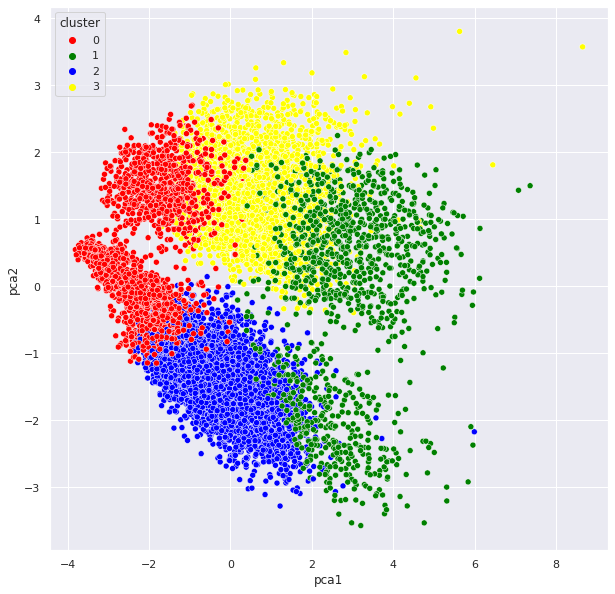

In [92]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_a_df, palette =['red','green','blue','yellow'])
plt.show()

In [93]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [customer_df.columns])
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [customer_df.columns])
cluster_centers

#First Customer Cluster: women
#Second Customer Cluster: Churners
#Third Customer Cluster: Higher income, Men
#Fourth Customer Cluster: higher income, high credit limits, low utilization ratio 

Attrition_Flag Customer_Age    Gender Dependent_count Education_Level  \
0       0.004157    46.401155  0.979677        2.326097        2.602309   
1       0.984452    46.861484  0.643110        2.401413        2.647350   
2       0.017133    46.037562  0.000329        2.251730        2.579572   
3       0.121752    46.171492  0.152190        2.565702        2.603563   

  Marital_Status Income_Category Card_Category Months_on_book  \
0       1.077136        1.002079      0.013857      35.869284   
1       1.089753        1.794346      0.017668      36.464311   
2       0.989127        3.166392      0.000988      35.776606   
3       1.240535        3.440238      0.563474      35.897550   

  Total_Relationship_Count Months_Inactive_12_mon Contacts_Count_12_mon  \
0                 3.905774               2.282217              2.293764   
1                 3.311661               2.718728              2.987279   
2                 4.139703               2.266557              2.449094   
3                 3.302153               2.302153              2.429844   

   Credit_Limit Total_Revolving_Bal Avg_Open_To_Buy Total_Amt_Chng_Q4_Q1  \
0   4375.675658         1254.201386     3121.474273             0.770625   
1   5517.772933          604.934276     4912.838657             0.673453   
2   7744.996639         1280.212191     6464.784448             0.783326   
3  27583.820341         1190.571641    26393.248701             0.763757   

  Total_Trans_Amt Total_Trans_Ct Total_Ct_Chng_Q4_Q1 Avg_Utilization_Ratio  
0     4617.118707      71.053349            0.753576              0.388190  
1     2655.136396      42.679859            0.527339              0.168080  
2     3824.957825      61.214827            0.739137              0.264005  
3     6861.390497      76.454343            0.712862              0.047435